# create or update environment dependencies

In [ ]:
#!conda env create -f environment.yaml
#!conda env update --name lost --file environment.yaml --prune

# import libraries

In [1]:
import sys
import xarray as xr
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt



# get ERA5 data

In [ ]:
sys.path.append('/Users/backeb/Documents/repos/myscripts/era5')
from download_era5 import get_era5_single_levels


get_era5_single_levels( 
    longitude_min = 45.0,
    longitude_max = 65.0,
    latitude_min = -50.0,
    latitude_max = -30.0,
    date_min = '2021-05-15',
    date_max = '2021-06-15',
    vars = ('10m_u_component_of_wind', '10m_v_component_of_wind'),
    outdir = '/Users/backeb/Documents/data/lost_use_case_wakashio_maru'
)

In [ ]:
# ds = xr.open_dataset('/Users/backeb/Documents/data/lost_use_case_wakashio_maru/era5/era5.nc')
# ds.time.data

# get CMEMS data

In [ ]:
sys.path.append('/Users/backeb/Documents/repos/myscripts/cmems')
from download_cmems_physics import get_nrt_hourly

get_nrt_hourly(  
    username = 'bbackeberg', 
    password = 'iaTmwJ7D', 
    longitude_min = 45.0,
    longitude_max = 65.0,
    latitude_min = -50.0,
    latitude_max = -30.0,
    date_min = '2021-05-15',
    date_max = '2021-06-15',
    vars = ('uo', 'vo'),
    outdir = '/Users/backeb/Documents/data/lost_use_case_wakashio_maru'
)

In [ ]:
# ds = xr.open_dataset('/Users/backeb/Documents/data/lost_use_case_wakashio_maru/cmems/cmems.nc')
# ds.time.data

# interpolate to consistent timestamp

In [2]:
ds_cmems = xr.open_dataset('/Users/backeb/Documents/data/lost_use_case_wakashio_maru/cmems/cmems.nc')
ds_era5 = xr.open_dataset('/Users/backeb/Documents/data/lost_use_case_wakashio_maru/era5/era5.nc')
ds_cmems_interp = ds_cmems.interp(time = ds_era5.time)



/opt/miniconda3/envs/lost/lib/python3.8/site-packages/xarray/core/missing.py:535: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(np.min(new_x.values), method="nearest")
/opt/miniconda3/envs/lost/lib/python3.8/site-packages/xarray/core/missing.py:536: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(np.max(new_x.values), method="nearest")


Text(0.5, 1.0, 'difference')

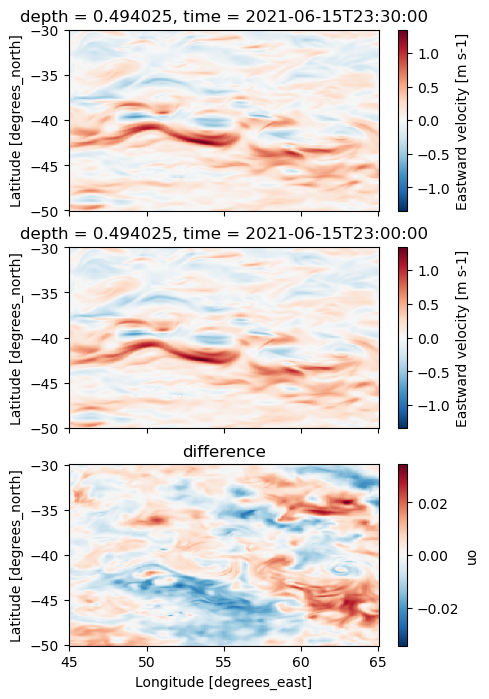

In [3]:
i=-1
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 8), sharex=True)
ds_cmems.uo[i,0,:,:].plot(ax=ax1)
ax1.set_xlabel('')
ds_cmems_interp.uo[i,0,:,:].plot(ax=ax2)
ax2.set_xlabel('')
(ds_cmems.uo[i,0,:,:]-ds_cmems_interp.uo[i,0,:,:]).plot(ax=ax3)
ax3.set_title('difference')

# write to new netcdf

In [4]:
ds_cmems_interp.to_netcdf('/Users/backeb/Documents/data/lost_use_case_wakashio_maru/cmems/cmems_interp.nc')

In [5]:
ds_cmems_interp

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 241, longitude: 241, time: 768)
Coordinates:
  * longitude  (longitude) float32 45.0 45.083332 45.166668 ... 64.916664 65.0
  * depth      (depth) float32 0.494025
  * latitude   (latitude) float32 -50.0 -49.916668 ... -30.083334 -30.0
  * time       (time) datetime64[ns] 2021-05-15 ... 2021-06-15T23:00:00
Data variables:
    uo         (time, depth, latitude, longitude) float64 nan nan ... -0.03693
    vo         (time, depth, latitude, longitude) float64 nan nan ... -0.08393
Attributes:
    title:                              hourly mean fields from Global Ocean ...
    easting:                            longitude
    northing:                           latitude
    history:                            2022/08/29 00:02:49 MERCATOR OCEAN Ne...
    source:                             MERCATOR PSY4QV3R1
    institution:                        MERCATOR OCEAN
    references:                         http://www.mercator-ocean.fr
    comment:                            CMEMS product
    Conventions:                        CF-1.4
    domain_name:                        GL12
    FROM_ORIGINAL_FILE__field_type:     mean
    field_date:                         2022-09-07 00:00:00
    field_julian_date:                  26547.0
    julian_day_unit:                    days since 1950-01-01 00:00:00
    forecast_range:                     9-day_forecast
    forecast_type:                      forecast
    bulletin_date:                      2022-08-29 00:00:00
    bulletin_type:                      operational
    FROM_ORIGINAL_FILE__longitude_min:  -180.0
    FROM_ORIGINAL_FILE__longitude_max:  179.91667
    FROM_ORIGINAL_FILE__latitude_min:   -80.0
    FROM_ORIGINAL_FILE__latitude_max:   90.0
    z_min:                              0.494025
    z_max:                              0.494025
    _CoordSysBuilder:                   ucar.nc2.dataset.conv.CF1Convention